<a href="https://colab.research.google.com/github/WHARN0/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktikum**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

  a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

  b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im



c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.


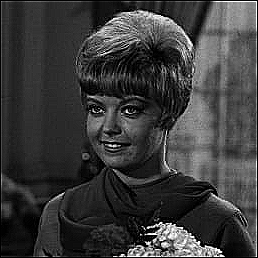

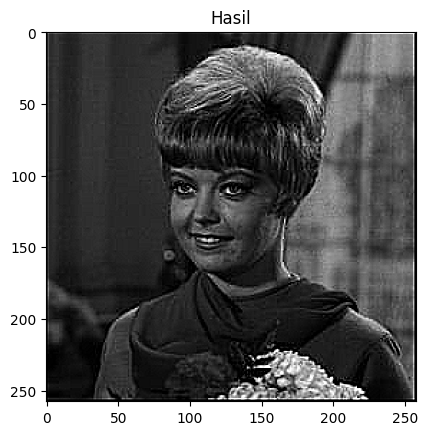

In [7]:
def load_image_from_drive(image_path):
    img = im.open(image_path).convert('L')
    img_array = np.array(img)
    return img_array

def convolution2d(image, kernel, stride, padding):
    h, w = image.shape
    kh, kw = kernel.shape

    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    padded_h, padded_w = image_padded.shape
    out_h = (padded_h - kh) // stride + 1
    out_w = (padded_w - kw) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(0, out_h):
        for j in range(0, out_w):
            region = image_padded[i*stride:i*stride+kh, j*stride:j*stride+kw]
            output[i, j] = np.sum(region * kernel)

    return output

image_path = '/content/drive/MyDrive/PCVK_MM/Images/female.tiff'

image = load_image_from_drive(image_path)

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

output = convolution2d(image, kernel, 1, 2)

cv2_imshow(output)

plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.title('Hasil')
plt.show()

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

  e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

In [19]:
# Sharpen
Sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Emboss
Emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

# Left Sobel Edge Detection
Lsed = np.array([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]])

# Canny Edge Detection
Ced = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])

# Prewitt Edge Detection
Ped = np.array([[-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]])

# 5 x 5 Gaussian Blur
Gauss5 = np.array([[1,  4,  6,  4,  1],
                    [4, 16, 24, 16,  4],
                    [6, 24, 36, 24,  6],
                    [4, 16, 24, 16,  4],
                    [1,  4,  6,  4,  1]]) / 256

# 21 x 21 Gaussian Blur
kernel_size = 21

sigma = math.sqrt(kernel_size)

gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)

gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

Gauss21 = gaussian_kernel_2d

**Operasi Sharpen**

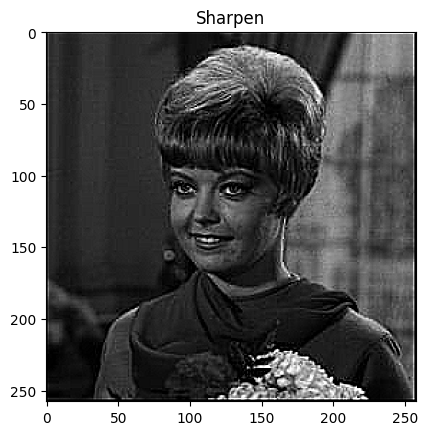

In [20]:
output_sharpen = convolution2d(image, Sharpen, 1, 2)

plt.imshow(output_sharpen, cmap='gray', vmin=0, vmax=255)
plt.title('Sharpen')
plt.show()

**Operasi Emboss**

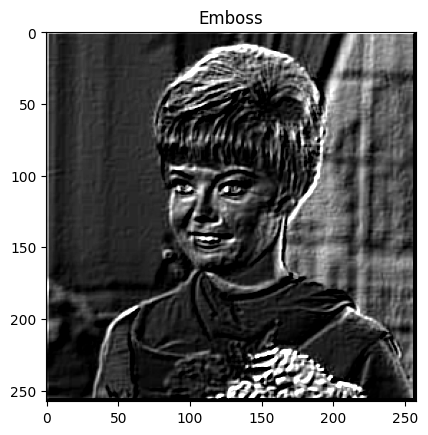

In [21]:
output_emboss = convolution2d(image, Emboss, 1, 2)

plt.imshow(output_emboss, cmap='gray', vmin=0, vmax=255)
plt.title('Emboss')
plt.show()

**Operasi Left Sobel Edge Detection**

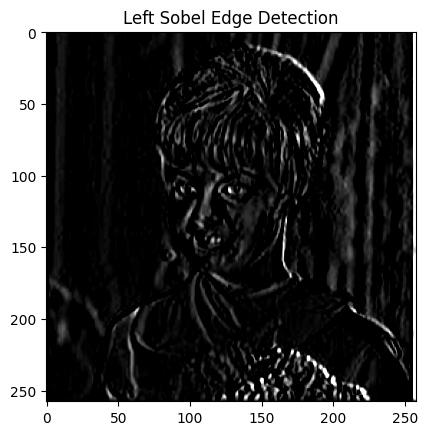

In [22]:
output_lsed = convolution2d(image, Lsed, 1, 2)

plt.imshow(output_lsed, cmap='gray', vmin=0, vmax=255)
plt.title('Left Sobel Edge Detection')
plt.show()

**Operasi Canny Edge Detection**

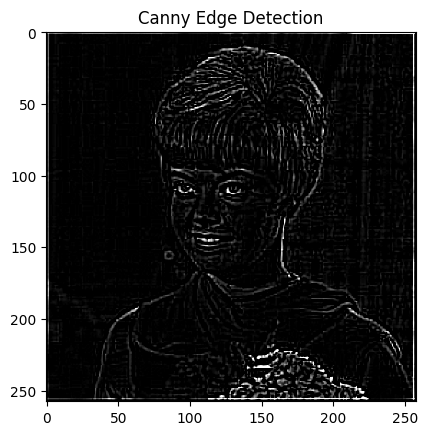

In [23]:
output_ced = convolution2d(image, Ced, 1, 2)

plt.imshow(output_ced, cmap='gray', vmin=0, vmax=255)
plt.title('Canny Edge Detection')
plt.show()

**Operasi Prewitt Edge Detection**

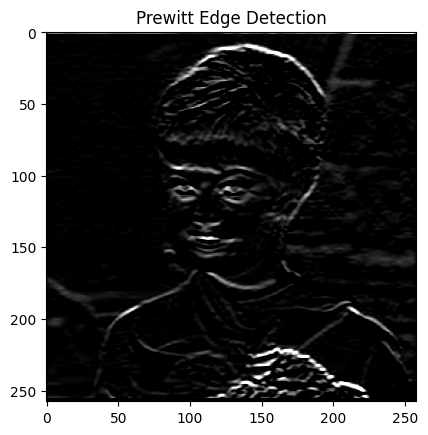

In [24]:
output_ped = convolution2d(image, Ped, 1, 2)

plt.imshow(output_ped, cmap='gray', vmin=0, vmax=255)
plt.title('Prewitt Edge Detection')
plt.show()

**Operasi 5x5 Gaussian Blur**

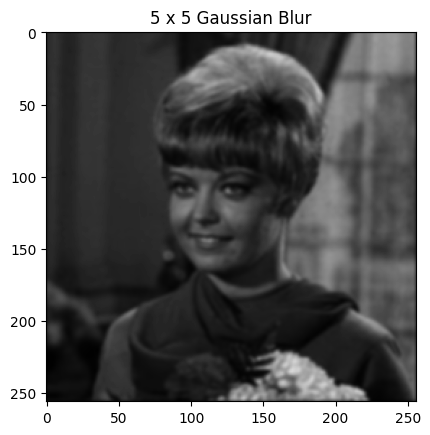

In [25]:
output_gauss5 = convolution2d(image, Gauss5, 1, 2)

plt.imshow(output_gauss5, cmap='gray', vmin=0, vmax=255)
plt.title('5 x 5 Gaussian Blur')
plt.show()

**Operasi 21x21 Gaussian Blur**

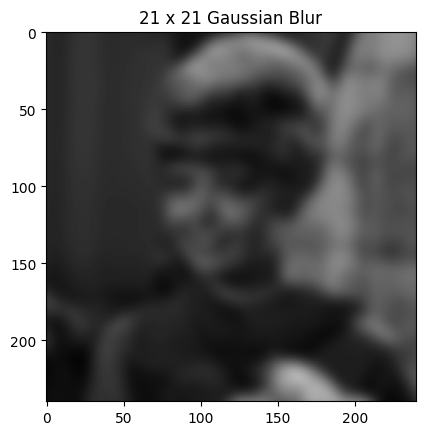

In [27]:
output_gauss21 = convolution2d(image, Gauss21, 1, 2)

plt.imshow(output_gauss21, cmap='gray', vmin=0, vmax=255)
plt.title('21 x 21 Gaussian Blur')
plt.show()